# Importing Packages

In [ ]:
import matplotlib.pyplot as plt #For plotting
import numpy as np #Provides fast numerical computing such as arrays and linear algebra
import pandas as pd #Provides R like data structures and a high level API to work with data
from pandas import DataFrame, Series
import seaborn as sns #To make your plots look better
import apyori as ap
import pickle
from apyori import apriori #Apriori Algorithm
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

### Loading data in dataframe

In [77]:
Attritiondata = pd.read_csv("/Users/yashpasar/Desktop/MSIM/707/HW_1/employee_attrition.csv")
pd.set_option('display.max_columns', 100)

### Number of entries

In [78]:
print("Number of entries: " + str(len(Attritiondata.index)))

Number of entries: 1176


In [79]:
Attritiondata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,4,Male,96,3,2.0,Sales Executive,3,Married,5301,2939,8,Y,No,15.0,3.0,3.0,80,2,4.0,2,2,2,1,2.0,2
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,4,Female,82,3,2.0,Laboratory Technician,3,Married,3149,21821,8,Y,No,20.0,4.0,2.0,80,1,9.0,3,3,5,2,1.0,4
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,3,Female,68,2,2.0,Sales Executive,3,Single,6244,7824,7,Y,No,17.0,3.0,1.0,80,0,10.0,6,3,5,4,0.0,3
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,4,Male,37,2,4.0,Healthcare Representative,2,Divorced,13577,25592,1,Y,Yes,15.0,3.0,4.0,80,1,34.0,3,3,33,9,15.0,0
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,4,Female,91,2,3.0,Healthcare Representative,2,Single,8606,21195,1,Y,No,19.0,3.0,4.0,80,0,11.0,3,1,11,8,3.0,3


# Exploratory Data Analysis

In [80]:
Attritiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1174 non-null float64
Education                   1176 non-null int64
EducationField              1176 non-null object
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1175 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1175 non-null float64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus               1176 non-null object
MonthlyIncome     

### Dropping Null Values

In [81]:
Refined_data = Attritiondata.drop(['EmployeeCount', 'EmployeeNumber', 'MonthlyRate', 'StandardHours'], axis=1)

In [82]:
def replacenull(col):
    array = Refined_data[Refined_data[col] != np.nan][col]
    Refined_data[col] = Refined_data[col].replace(np.NaN, array.median())
    return Refined_data[col]

def replacenullmode(col):
    array = Refined_data[Refined_data[col] != np.nan][col]
    Refined_data[col] = Refined_data[col].replace(np.NaN, array.mode()[0])
    return Refined_data[col] 

replacenull('DistanceFromHome')
replacenull('JobLevel')
replacenull('PercentSalaryHike')
replacenull('PerformanceRating')
replacenull('RelationshipSatisfaction')
replacenull('TotalWorkingYears')
replacenull('YearsSinceLastPromotion')
replacenullmode('Gender')
replacenullmode('OverTime')

0        No
1        No
2        No
3       Yes
4        No
5        No
6       Yes
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15      Yes
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24       No
25      Yes
26       No
27      Yes
28       No
29      Yes
       ... 
1146     No
1147     No
1148    Yes
1149     No
1150     No
1151    Yes
1152    Yes
1153     No
1154     No
1155    Yes
1156    Yes
1157    Yes
1158    Yes
1159     No
1160     No
1161    Yes
1162     No
1163     No
1164     No
1165    Yes
1166     No
1167    Yes
1168     No
1169     No
1170    Yes
1171     No
1172    Yes
1173     No
1174     No
1175    Yes
Name: OverTime, Length: 1176, dtype: object

In [83]:
Refined_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [84]:
str(len(Refined_data.index))

'1176'

In [85]:
Refined_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [86]:
Attrition = Refined_data.groupby('Attrition')
Attrition.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,
No,37.583249,811.906155,9.168517,2.896065,2.756811,65.720484,2.776993,2.144299,2.772957,6845.321897,2.655903,15.285570,3.158426,2.730575,0.841574,11.983855,2.847629,2.767911,7.248234,4.395560,2.192735,4.523713
Yes,33.621622,738.681081,11.221622,2.891892,2.427027,66.367568,2.545946,1.664865,2.372973,4812.508108,2.994595,15.340541,3.183784,2.654054,0.551351,8.275676,2.605405,2.637838,5.151351,2.843243,1.756757,2.735135


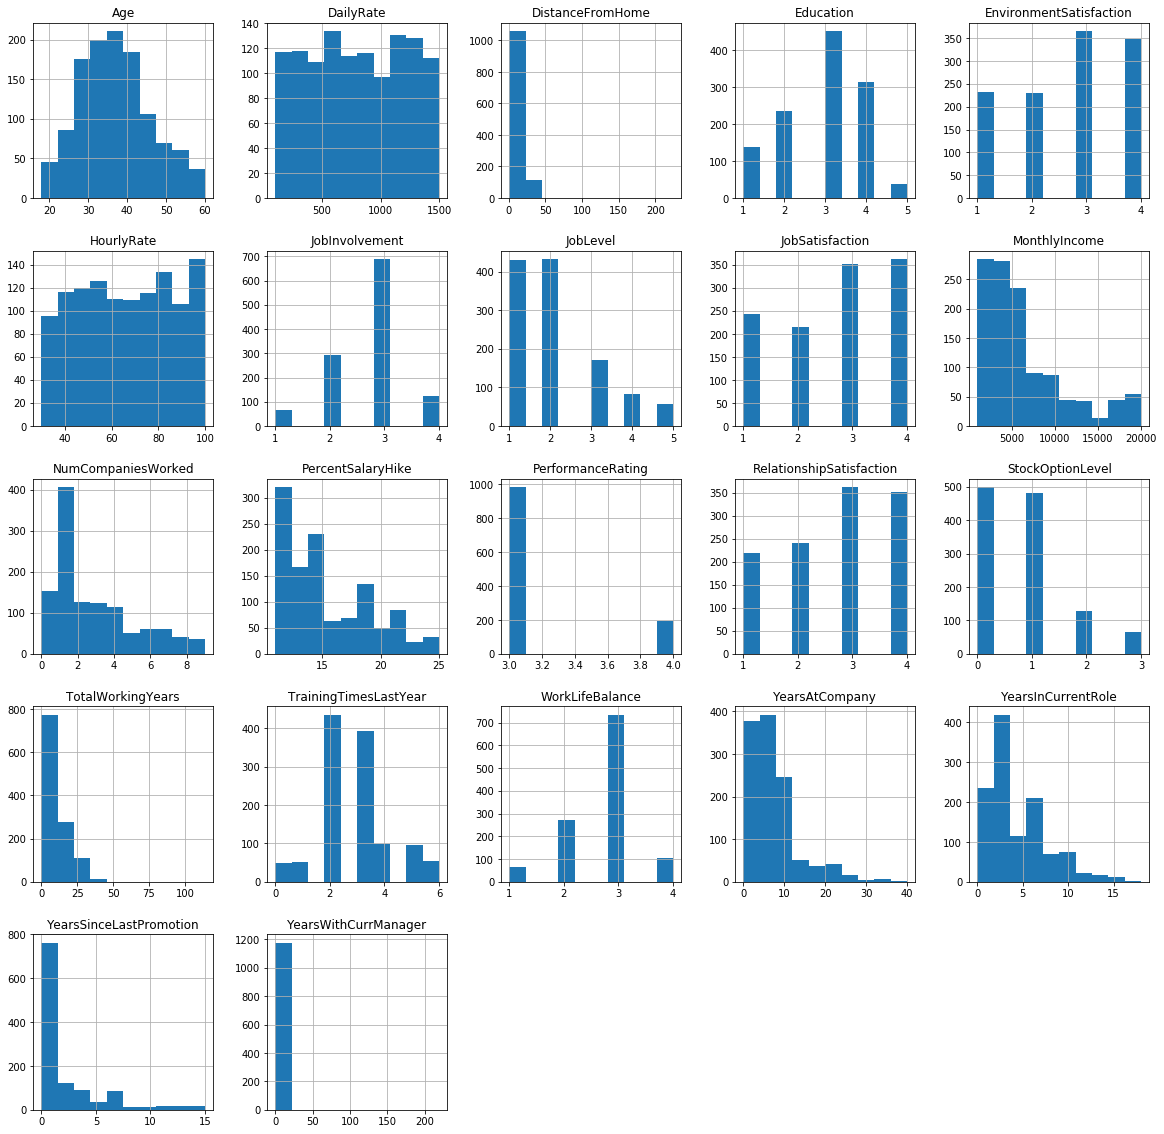

In [87]:
Refined_data.hist(figsize=(20,20))
plt.show()

In [88]:
Refined_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.960034,800.386905,9.491497,2.895408,2.704932,65.822279,2.740646,2.068878,2.710034,6525.534014,2.709184,15.294218,3.162415,2.718537,0.795918,11.400510,2.809524,2.747449,6.918367,4.151361,2.124150,4.242347
std,9.071964,404.709216,10.243168,1.025685,1.094128,20.292035,0.719277,1.109119,1.113217,4707.507472,2.476191,3.697521,0.368988,1.083664,0.847033,8.361938,1.307697,0.691586,6.107140,3.501618,3.182382,7.210390
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,461.750000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2954.500000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4950.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8354.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,224.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,9.000000,25.000000,4.000000,4.000000,3.000000,114.000000,6.000000,4.000000,40.000000,18.000000,15.000000,219.000000


In [89]:
# Find correlations with the target and sort
Attritiondata['Target'] = Attritiondata['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
correlations = Attritiondata.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 NumCompaniesWorked    0.049822
DistanceFromHome      0.072845
Target                1.000000
EmployeeCount              NaN
StandardHours              NaN
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.161647
YearsInCurrentRole   -0.161477
Age                  -0.159064
JobLevel             -0.157488
MonthlyIncome        -0.157292
Name: Target, dtype: float64


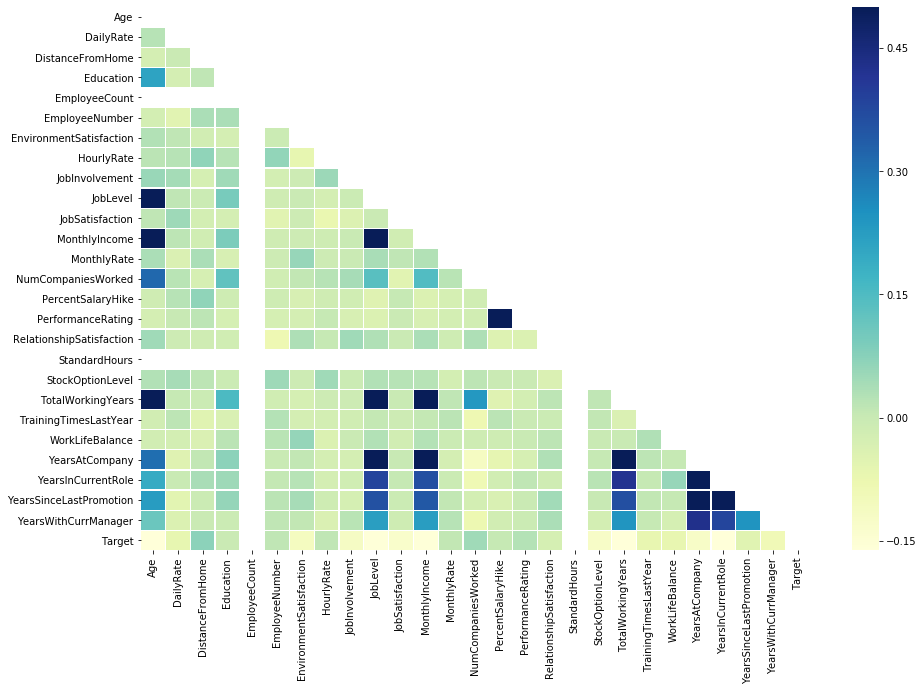

In [90]:
# Calculate correlations
corr = Attritiondata.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [91]:
Refined_data['YearsWithCurrManager'].value_counts()

2      292
0      206
7      170
3      113
4       78
8       75
1       64
9       49
5       26
10      23
6       20
11      18
12      16
13       9
17       7
15       4
14       3
16       2
219      1
Name: YearsWithCurrManager, dtype: int64

# Discretizing all variables

In [92]:
Refined_data['Age'] = pd.qcut(Refined_data.Age, 3, labels = ['young_age','med_age','old_age'])

In [93]:
Refined_data["Education"] = pd.cut(Refined_data.Education, [0,3,5], labels = ['low_edu', 'high_edu'])

In [94]:
Refined_data['DailyRate'] = pd.cut(Refined_data.DailyRate, [0,461,796,1162,1500], labels = ['Q1_Daily_rate', 'Q2_Daily_rate', 'Q3_Daily_rate', 'Q4_Daily_rate'])

In [95]:
Refined_data['DistanceFromHome'] = pd.cut(Refined_data.DistanceFromHome, [0,2,7,14,224], labels = ['Q1_Dist', 'Q2_Dist', 'Q3_Dist', 'Q4_Dist'])

In [96]:
Refined_data['EnvironmentSatisfaction'] = pd.cut(Refined_data.EnvironmentSatisfaction, [0,2,3,4,4.1], labels = ['Q1_Env', 'Q2_Env', 'Q3_Env', 'Q4_Env'])

In [97]:
Refined_data['HourlyRate'] = pd.qcut(Refined_data.HourlyRate, 4, labels = ['Q1_HourlyRate', 'Q2_HourlyRate', 'Q3_HourlyRate', 'Q4_HourlyRate'])

In [98]:
Refined_data['JobInvolvement'] = pd.cut(Refined_data.JobInvolvement, [1,2,3,4], labels = ['Q1_JobInvolvement', 'Q2_JobInvolvement', 'Q3_JobInvolvement'])

In [99]:
Refined_data["JobLevel"] = pd.cut(Refined_data.JobLevel, [0,3,5], labels = ['low_JobLevel', 'high_JobLevel'])

In [100]:
Refined_data["JobSatisfaction"] = pd.cut(Refined_data.JobSatisfaction, [0,3,4], labels = ['low_JobSatisfaction', 'high_JobSatisfaction'])

In [101]:
Refined_data['MonthlyIncome'] = pd.qcut(Refined_data.MonthlyIncome, 4, labels = ['Q1_MonthlyIncome', 'Q2_MonthlyIncome', 'Q3_MonthlyIncome', 'Q4_MonthlyIncome'])

In [102]:
Refined_data['NumCompaniesWorked'] = pd.qcut(Refined_data.NumCompaniesWorked, 4, labels = ['Q1_NumCompaniesWorked', 'Q2_NumCompaniesWorked', 'Q3_NumCompaniesWorked', 'Q4_NumCompaniesWorked'])

In [103]:
Refined_data['PercentSalaryHike'] = pd.qcut(Refined_data.PercentSalaryHike, 4, labels = ['Q1_PercentSalaryHike', 'Q2_PercentSalaryHike', 'Q3_PercentSalaryHike', 'Q4_PercentSalaryHike'])

In [104]:
Refined_data['PerformanceRating'] = pd.cut(Refined_data.PerformanceRating, [0,3,5], labels = ['Three', 'Four'])

In [105]:
Refined_data['RelationshipSatisfaction'] = pd.cut(Refined_data.RelationshipSatisfaction, [0,2,4], labels = ['low_Satisfaction', 'high_Satisfaction'])

In [106]:
Refined_data['StockOptionLevel'] = pd.cut(Refined_data.StockOptionLevel, [-1,0,1,2,3], labels = ['Level0', 'Level1', 'Leve2', 'Level3'])

In [107]:
Refined_data['TotalWorkingYears'] = pd.qcut(Refined_data.TotalWorkingYears, 4, labels = ['Q1_TotalWorkingYears', 'Q2_TotalWorkingYears', 'Q3_TotalWorkingYears', 'Q4_TotalWorkingYears'])

In [108]:
Refined_data['TrainingTimesLastYear'] = pd.cut(Refined_data.TrainingTimesLastYear, [0,2,4,6], labels = ['0-2 years', '2-4 years', '4-6 years'])

In [109]:
Refined_data['WorkLifeBalance'] = pd.cut(Refined_data.WorkLifeBalance, [0,2,4], labels = ['Low_WorkLifeBalance', 'High_WorkLifeBalance'])

In [110]:
Refined_data['YearsAtCompany'] = pd.qcut(Refined_data.YearsAtCompany, 4, labels = ['Q1_YearsAtCompany', 'Q2_YearsAtCompany', 'Q3_YearsAtCompany', 'Q4_YearsAtCompany'])

In [111]:
Refined_data['YearsInCurrentRole'] = pd.cut(Refined_data.YearsInCurrentRole, [0,4.5,9,13.5,18], labels = ['0-4.5 years', '4.5-9 years', '9-13.5 years', '13.5-18 years'])

In [112]:
Refined_data['YearsSinceLastPromotion'] = pd.cut(Refined_data.YearsSinceLastPromotion, [-1,5,10,15], labels = ['0-5 years', '5-10 years', '10-15 years'])

In [113]:
Refined_data['YearsWithCurrManager'] = pd.cut(Refined_data.YearsWithCurrManager, [-1,5,10,15,219], labels = ['0-5 years', '5-10 years', '10-15 years', '15-21 years'])

In [114]:
Refined_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,young_age,No,Travel_Rarely,Q4_Daily_rate,Sales,Q4_Dist,low_edu,Life Sciences,Q3_Env,Male,Q4_HourlyRate,Q2_JobInvolvement,low_JobLevel,Sales Executive,low_JobSatisfaction,Married,Q3_MonthlyIncome,Q4_NumCompaniesWorked,Y,No,Q3_PercentSalaryHike,Three,high_Satisfaction,Leve2,Q1_TotalWorkingYears,0-2 years,Low_WorkLifeBalance,Q1_YearsAtCompany,0-4.5 years,0-5 years,0-5 years
1,old_age,No,Travel_Rarely,Q4_Daily_rate,Research & Development,Q3_Dist,high_edu,Life Sciences,Q3_Env,Female,Q3_HourlyRate,Q2_JobInvolvement,low_JobLevel,Laboratory Technician,low_JobSatisfaction,Married,Q2_MonthlyIncome,Q4_NumCompaniesWorked,Y,No,Q4_PercentSalaryHike,Four,low_Satisfaction,Level1,Q2_TotalWorkingYears,2-4 years,High_WorkLifeBalance,Q2_YearsAtCompany,0-4.5 years,0-5 years,0-5 years
2,old_age,No,Travel_Rarely,Q2_Daily_rate,Sales,Q3_Dist,low_edu,Medical,Q2_Env,Female,Q3_HourlyRate,Q1_JobInvolvement,low_JobLevel,Sales Executive,low_JobSatisfaction,Single,Q3_MonthlyIncome,Q4_NumCompaniesWorked,Y,No,Q3_PercentSalaryHike,Three,low_Satisfaction,Level0,Q2_TotalWorkingYears,4-6 years,High_WorkLifeBalance,Q2_YearsAtCompany,0-4.5 years,0-5 years,0-5 years
3,old_age,No,Non-Travel,Q1_Daily_rate,Research & Development,Q3_Dist,low_edu,Medical,Q3_Env,Male,Q1_HourlyRate,Q1_JobInvolvement,high_JobLevel,Healthcare Representative,low_JobSatisfaction,Divorced,Q4_MonthlyIncome,Q1_NumCompaniesWorked,Y,Yes,Q3_PercentSalaryHike,Three,high_Satisfaction,Level1,Q4_TotalWorkingYears,2-4 years,High_WorkLifeBalance,Q4_YearsAtCompany,4.5-9 years,10-15 years,0-5 years
4,med_age,No,Travel_Rarely,Q3_Daily_rate,Research & Development,Q4_Dist,low_edu,Life Sciences,Q3_Env,Female,Q4_HourlyRate,Q1_JobInvolvement,low_JobLevel,Healthcare Representative,low_JobSatisfaction,Single,Q4_MonthlyIncome,Q1_NumCompaniesWorked,Y,No,Q4_PercentSalaryHike,Three,high_Satisfaction,Level0,Q3_TotalWorkingYears,2-4 years,Low_WorkLifeBalance,Q4_YearsAtCompany,4.5-9 years,0-5 years,0-5 years


In [115]:
Refined_data = Refined_data.astype('str')

In [116]:
Refined_data[Refined_data.columns] = Refined_data.apply(lambda x: x.str.strip())

In [117]:
Refined_data = Refined_data.astype('object')

In [118]:
Refined_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,young_age,No,Travel_Rarely,Q4_Daily_rate,Sales,Q4_Dist,low_edu,Life Sciences,Q3_Env,Male,Q4_HourlyRate,Q2_JobInvolvement,low_JobLevel,Sales Executive,low_JobSatisfaction,Married,Q3_MonthlyIncome,Q4_NumCompaniesWorked,Y,No,Q3_PercentSalaryHike,Three,high_Satisfaction,Leve2,Q1_TotalWorkingYears,0-2 years,Low_WorkLifeBalance,Q1_YearsAtCompany,0-4.5 years,0-5 years,0-5 years
1,old_age,No,Travel_Rarely,Q4_Daily_rate,Research & Development,Q3_Dist,high_edu,Life Sciences,Q3_Env,Female,Q3_HourlyRate,Q2_JobInvolvement,low_JobLevel,Laboratory Technician,low_JobSatisfaction,Married,Q2_MonthlyIncome,Q4_NumCompaniesWorked,Y,No,Q4_PercentSalaryHike,Four,low_Satisfaction,Level1,Q2_TotalWorkingYears,2-4 years,High_WorkLifeBalance,Q2_YearsAtCompany,0-4.5 years,0-5 years,0-5 years
2,old_age,No,Travel_Rarely,Q2_Daily_rate,Sales,Q3_Dist,low_edu,Medical,Q2_Env,Female,Q3_HourlyRate,Q1_JobInvolvement,low_JobLevel,Sales Executive,low_JobSatisfaction,Single,Q3_MonthlyIncome,Q4_NumCompaniesWorked,Y,No,Q3_PercentSalaryHike,Three,low_Satisfaction,Level0,Q2_TotalWorkingYears,4-6 years,High_WorkLifeBalance,Q2_YearsAtCompany,0-4.5 years,0-5 years,0-5 years
3,old_age,No,Non-Travel,Q1_Daily_rate,Research & Development,Q3_Dist,low_edu,Medical,Q3_Env,Male,Q1_HourlyRate,Q1_JobInvolvement,high_JobLevel,Healthcare Representative,low_JobSatisfaction,Divorced,Q4_MonthlyIncome,Q1_NumCompaniesWorked,Y,Yes,Q3_PercentSalaryHike,Three,high_Satisfaction,Level1,Q4_TotalWorkingYears,2-4 years,High_WorkLifeBalance,Q4_YearsAtCompany,4.5-9 years,10-15 years,0-5 years
4,med_age,No,Travel_Rarely,Q3_Daily_rate,Research & Development,Q4_Dist,low_edu,Life Sciences,Q3_Env,Female,Q4_HourlyRate,Q1_JobInvolvement,low_JobLevel,Healthcare Representative,low_JobSatisfaction,Single,Q4_MonthlyIncome,Q1_NumCompaniesWorked,Y,No,Q4_PercentSalaryHike,Three,high_Satisfaction,Level0,Q3_TotalWorkingYears,2-4 years,Low_WorkLifeBalance,Q4_YearsAtCompany,4.5-9 years,0-5 years,0-5 years


In [119]:
Refined_data1 = pd.DataFrame({col:str(col)+'=' for col in Refined_data}, index=Refined_data.index) + Refined_data.astype(str)

In [120]:
Refined_data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Age=young_age,Attrition=No,BusinessTravel=Travel_Rarely,DailyRate=Q4_Daily_rate,Department=Sales,DistanceFromHome=Q4_Dist,Education=low_edu,EducationField=Life Sciences,EnvironmentSatisfaction=Q3_Env,Gender=Male,HourlyRate=Q4_HourlyRate,JobInvolvement=Q2_JobInvolvement,JobLevel=low_JobLevel,JobRole=Sales Executive,JobSatisfaction=low_JobSatisfaction,MaritalStatus=Married,MonthlyIncome=Q3_MonthlyIncome,NumCompaniesWorked=Q4_NumCompaniesWorked,Over18=Y,OverTime=No,PercentSalaryHike=Q3_PercentSalaryHike,PerformanceRating=Three,RelationshipSatisfaction=high_Satisfaction,StockOptionLevel=Leve2,TotalWorkingYears=Q1_TotalWorkingYears,TrainingTimesLastYear=0-2 years,WorkLifeBalance=Low_WorkLifeBalance,YearsAtCompany=Q1_YearsAtCompany,YearsInCurrentRole=0-4.5 years,YearsSinceLastPromotion=0-5 years,YearsWithCurrManager=0-5 years
1,Age=old_age,Attrition=No,BusinessTravel=Travel_Rarely,DailyRate=Q4_Daily_rate,Department=Research & Development,DistanceFromHome=Q3_Dist,Education=high_edu,EducationField=Life Sciences,EnvironmentSatisfaction=Q3_Env,Gender=Female,HourlyRate=Q3_HourlyRate,JobInvolvement=Q2_JobInvolvement,JobLevel=low_JobLevel,JobRole=Laboratory Technician,JobSatisfaction=low_JobSatisfaction,MaritalStatus=Married,MonthlyIncome=Q2_MonthlyIncome,NumCompaniesWorked=Q4_NumCompaniesWorked,Over18=Y,OverTime=No,PercentSalaryHike=Q4_PercentSalaryHike,PerformanceRating=Four,RelationshipSatisfaction=low_Satisfaction,StockOptionLevel=Level1,TotalWorkingYears=Q2_TotalWorkingYears,TrainingTimesLastYear=2-4 years,WorkLifeBalance=High_WorkLifeBalance,YearsAtCompany=Q2_YearsAtCompany,YearsInCurrentRole=0-4.5 years,YearsSinceLastPromotion=0-5 years,YearsWithCurrManager=0-5 years
2,Age=old_age,Attrition=No,BusinessTravel=Travel_Rarely,DailyRate=Q2_Daily_rate,Department=Sales,DistanceFromHome=Q3_Dist,Education=low_edu,EducationField=Medical,EnvironmentSatisfaction=Q2_Env,Gender=Female,HourlyRate=Q3_HourlyRate,JobInvolvement=Q1_JobInvolvement,JobLevel=low_JobLevel,JobRole=Sales Executive,JobSatisfaction=low_JobSatisfaction,MaritalStatus=Single,MonthlyIncome=Q3_MonthlyIncome,NumCompaniesWorked=Q4_NumCompaniesWorked,Over18=Y,OverTime=No,PercentSalaryHike=Q3_PercentSalaryHike,PerformanceRating=Three,RelationshipSatisfaction=low_Satisfaction,StockOptionLevel=Level0,TotalWorkingYears=Q2_TotalWorkingYears,TrainingTimesLastYear=4-6 years,WorkLifeBalance=High_WorkLifeBalance,YearsAtCompany=Q2_YearsAtCompany,YearsInCurrentRole=0-4.5 years,YearsSinceLastPromotion=0-5 years,YearsWithCurrManager=0-5 years
3,Age=old_age,Attrition=No,BusinessTravel=Non-Travel,DailyRate=Q1_Daily_rate,Department=Research & Development,DistanceFromHome=Q3_Dist,Education=low_edu,EducationField=Medical,EnvironmentSatisfaction=Q3_Env,Gender=Male,HourlyRate=Q1_HourlyRate,JobInvolvement=Q1_JobInvolvement,JobLevel=high_JobLevel,JobRole=Healthcare Representative,JobSatisfaction=low_JobSatisfaction,MaritalStatus=Divorced,MonthlyIncome=Q4_MonthlyIncome,NumCompaniesWorked=Q1_NumCompaniesWorked,Over18=Y,OverTime=Yes,PercentSalaryHike=Q3_PercentSalaryHike,PerformanceRating=Three,RelationshipSatisfaction=high_Satisfaction,StockOptionLevel=Level1,TotalWorkingYears=Q4_TotalWorkingYears,TrainingTimesLastYear=2-4 years,WorkLifeBalance=High_WorkLifeBalance,YearsAtCompany=Q4_YearsAtCompany,YearsInCurrentRole=4.5-9 years,YearsSinceLastPromotion=10-15 years,YearsWithCurrManager=0-5 years
4,Age=med_age,Attrition=No,BusinessTravel=Travel_Rarely,DailyRate=Q3_Daily_rate,Department=Research & Development,DistanceFromHome=Q4_Dist,Education=low_edu,Educati

### Converting Wide format to Long format

In [121]:
melted_data = pd.melt(Refined_data1)
melted_data.head()

,variable,value
0,Age,Age=young_age
1,Age,Age=old_age
2,Age,Age=old_age
3,Age,Age=old_age
4,Age,Age=med_age


In [122]:
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=True)
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})
freq_itemset.tail(10)

,item,frequency
95,JobSatisfaction=low_JobSatisfaction,813
96,Education=low_edu,825
97,WorkLifeBalance=High_WorkLifeBalance,839
98,OverTime=No,839
99,BusinessTravel=Travel_Rarely,839
100,PerformanceRating=Three,985
101,Attrition=No,991
102,YearsSinceLastPromotion=0-5 years,1012
103,JobLevel=low_JobLevel,1035
104,Over18=Y,1176


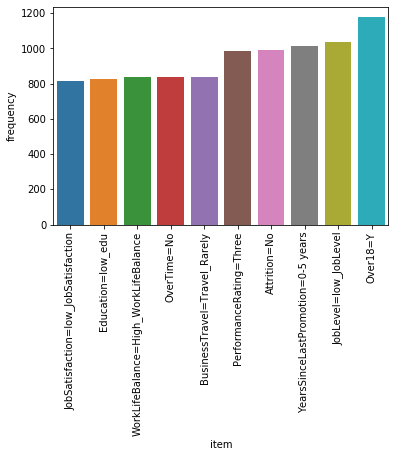

In [123]:
g = sns.barplot(data=freq_itemset.tail(10), x='item', y='frequency')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

### Creating a list in a list 

In [127]:
records = []
for i in range(0,len(Refined_data1)):
    records.append([str(Refined_data1.values[i,j]) 
    for j in range(0, len(Refined_data1.columns))])
    
record=pickle.dump(records, open( "records.pkl", "wb" ) )

In [128]:
frequent_itemset = ap.apriori(records, min_support=0.5, min_confidence=0.5,
                              min_lift=1,min_length=2)
results = list(frequent_itemset)
len(results)
results[1:5]

[RelationRecord(items=frozenset({'BusinessTravel=Travel_Rarely'}), support=0.7134353741496599, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BusinessTravel=Travel_Rarely'}), confidence=0.7134353741496599, lift=1.0)]),
 RelationRecord(items=frozenset({'Department=Research & Development'}), support=0.6496598639455783, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Department=Research & Development'}), confidence=0.6496598639455783, lift=1.0)]),
 RelationRecord(items=frozenset({'Education=low_edu'}), support=0.701530612244898, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Education=low_edu'}), confidence=0.701530612244898, lift=1.0)]),
 RelationRecord(items=frozenset({'Gender=Male'}), support=0.5901360544217688, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Gender=Male'}), confidence=0.5901360544217688, lift=1.0)])]

In [129]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Age=med_age,Age=old_age,Age=young_age,Attrition=No,Attrition=Yes,BusinessTravel=Non-Travel,BusinessTravel=Travel_Frequently,BusinessTravel=Travel_Rarely,DailyRate=Q1_Daily_rate,DailyRate=Q2_Daily_rate,DailyRate=Q3_Daily_rate,DailyRate=Q4_Daily_rate,Department=Human Resources,Department=Research & Development,Department=Sales,DistanceFromHome=Q1_Dist,DistanceFromHome=Q2_Dist,DistanceFromHome=Q3_Dist,DistanceFromHome=Q4_Dist,Education=high_edu,Education=low_edu,EducationField=Human Resources,EducationField=Life Sciences,EducationField=Marketing,EducationField=Medical,EducationField=Other,EducationField=Technical Degree,EnvironmentSatisfaction=Q1_Env,EnvironmentSatisfaction=Q2_Env,EnvironmentSatisfaction=Q3_Env,Gender=Female,Gender=Male,HourlyRate=Q1_HourlyRate,HourlyRate=Q2_HourlyRate,HourlyRate=Q3_HourlyRate,HourlyRate=Q4_HourlyRate,JobInvolvement=Q1_JobInvolvement,JobInvolvement=Q2_JobInvolvement,JobInvolvement=Q3_JobInvolvement,JobInvolvement=nan,JobLevel=high_JobLevel,JobLevel=low_JobLevel,JobRole=Healthcare Representative,JobRole=Human Resources,JobRole=Laboratory Technician,JobRole=Manager,JobRole=Manufacturing Director,JobRole=Research Director,JobRole=Research Scientist,JobRole=Sales Executive,...,MaritalStatus=Single,MonthlyIncome=Q1_MonthlyIncome,MonthlyIncome=Q2_MonthlyIncome,MonthlyIncome=Q3_MonthlyIncome,MonthlyIncome=Q4_MonthlyIncome,NumCompaniesWorked=Q1_NumCompaniesWorked,NumCompaniesWorked=Q2_NumCompaniesWorked,NumCompaniesWorked=Q3_NumCompaniesWorked,NumCompaniesWorked=Q4_NumCompaniesWorked,Over18=Y,OverTime=No,OverTime=Yes,PercentSalaryHike=Q1_PercentSalaryHike,PercentSalaryHike=Q2_PercentSalaryHike,PercentSalaryHike=Q3_PercentSalaryHike,PercentSalaryHike=Q4_PercentSalaryHike,PerformanceRating=Four,PerformanceRating=Three,RelationshipSatisfaction=high_Satisfaction,RelationshipSatisfaction=low_Satisfaction,StockOptionLevel=Leve2,StockOptionLevel=Level0,StockOptionLevel=Level1,StockOptionLevel=Level3,TotalWorkingYears=Q1_TotalWorkingYears,TotalWorkingYears=Q2_TotalWorkingYears,TotalWorkingYears=Q3_TotalWorkingYears,TotalWorkingYears=Q4_TotalWorkingYears,TrainingTimesLastYear=0-2 years,TrainingTimesLastYear=2-4 years,TrainingTimesLastYear=4-6 years,TrainingTimesLastYear=nan,WorkLifeBalance=High_WorkLifeBalance,WorkLifeBalance=Low_WorkLifeBalance,YearsAtCompany=Q1_YearsAtCompany,YearsAtCompany=Q2_YearsAtCompany,YearsAtCompany=Q3_YearsAtCompany,YearsAtCompany=Q4_YearsAtCompany,YearsInCurrentRole=0-4.5 years,YearsInCurrentRole=13.5-18 years,YearsInCurrentRole=4.5-9 years,YearsInCurrentRole=9-13.5 years,YearsInCurrentRole=nan,YearsSinceLastPromotion=0-5 years,YearsSinceLastPromotion=10-15 years,YearsSinceLastPromotion=5-10 years,YearsWithCurrManager=0-5 years,YearsWithCurrManager=10-15 years,YearsWithCurrManager=15-21 years,YearsWithCurrManager=5-10 years
0,False,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,True,True,False,False,False,True,False,False,True,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
1,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False
2,False,True,False,True,False

In [68]:
frequent_itemsets = apriori(df,min_support = 0.5, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by='support',ascending=False).head(10)

,support,itemsets,length
8,1.000000,(Over18=Y),1
51,0.880102,"(Over18=Y, JobLevel=low_JobLevel)",2
6,0.880102,(JobLevel=low_JobLevel),1
66,0.860544,"(YearsSinceLastPromotion=0-5 years, Over18=Y)",2
13,0.860544,(YearsSinceLastPromotion=0-5 years),1
0,0.842687,(Attrition=No),1
21,0.842687,"(Over18=Y, Attrition=No)",2
10,0.837585,(PerformanceRating=Three),1
63,0.837585,"(Over18=Y, PerformanceRating=Three)",2
56,0.781463,"(YearsSinceLastPromotion=0-5 years, JobLevel=l...",2


### Generating rules through default settings

In [69]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [70]:
rules[(rules['lift']>1) & (rules['confidence'] > 0.5)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Attrition=No),(BusinessTravel=Travel_Rarely),0.842687,0.713435,0.612245,0.726539,1.018367,0.011042,1.047917
1,(BusinessTravel=Travel_Rarely),(Attrition=No),0.713435,0.842687,0.612245,0.858164,1.018367,0.011042,1.109122
2,(Department=Research & Development),(Attrition=No),0.649660,0.842687,0.567177,0.873037,1.036015,0.019717,1.239042
3,(Attrition=No),(Department=Research & Development),0.842687,0.649660,0.567177,0.673058,1.036015,0.019717,1.071565
4,(JobInvolvement=Q2_JobInvolvement),(Attrition=No),0.586735,0.842687,0.503401,0.857971,1.018137,0.008968,1.107611
5,(Attrition=No),(JobInvolvement=Q2_JobInvolvement),0.842687,0.586735,0.503401,0.597376,1.018137,0.008968,1.026431
8,(Attrition=No),(OverTime=No),0.842687,0.713435,0.636054,0.754793,1.057970,0.034852,1.168665
9,(OverTime=No),(Attrition=No),0.713435,0.842687,0.636054,0.891538,1.057970,0.034852,1.450391
10,(Attrition=No),(PerformanceRating=Three),0.842687,0.837585,0.709184,0.841574,1.004763,0.003362,1.025180
11,(PerformanceRating=Three),(Attrition=No),0.837585,0.842687,0.709184,0.846701,1.004763,0.003362,1.026180


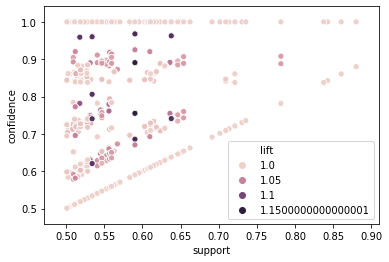

In [71]:
b = sns.scatterplot(data=rules,x='support',y='confidence',hue='lift')
plt.show()

### Generating rules when min_support is 0.78

In [72]:
frequent_itemsets1 = apriori(df,min_support = 0.78, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1.sort_values(by='support',ascending=False).head(10)

,support,itemsets,length
2,1.000000,(Over18=Y),1
1,0.880102,(JobLevel=low_JobLevel),1
6,0.880102,"(Over18=Y, JobLevel=low_JobLevel)",2
4,0.860544,(YearsSinceLastPromotion=0-5 years),1
9,0.860544,"(YearsSinceLastPromotion=0-5 years, Over18=Y)",2
0,0.842687,(Attrition=No),1
5,0.842687,"(Over18=Y, Attrition=No)",2
3,0.837585,(PerformanceRating=Three),1
8,0.837585,"(Over18=Y, PerformanceRating=Three)",2
7,0.781463,"(YearsSinceLastPromotion=0-5 years, JobLevel=l...",2


In [73]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.head()
rules1[(rules1['lift']>1) & (rules1['confidence'] > 0.8)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(YearsSinceLastPromotion=0-5 years),(JobLevel=low_JobLevel),0.860544,0.880102,0.781463,0.908103,1.031815,0.024096,1.304696
5,(JobLevel=low_JobLevel),(YearsSinceLastPromotion=0-5 years),0.880102,0.860544,0.781463,0.887923,1.031815,0.024096,1.244282
10,"(YearsSinceLastPromotion=0-5 years, Over18=Y)",(JobLevel=low_JobLevel),0.860544,0.880102,0.781463,0.908103,1.031815,0.024096,1.304696
12,"(Over18=Y, JobLevel=low_JobLevel)",(YearsSinceLastPromotion=0-5 years),0.880102,0.860544,0.781463,0.887923,1.031815,0.024096,1.244282
13,(YearsSinceLastPromotion=0-5 years),"(Over18=Y, JobLevel=low_JobLevel)",0.860544,0.880102,0.781463,0.908103,1.031815,0.024096,1.304696
15,(JobLevel=low_JobLevel),"(YearsSinceLastPromotion=0-5 years, Over18=Y)",0.880102,0.860544,0.781463,0.887923,1.031815,0.024096,1.244282


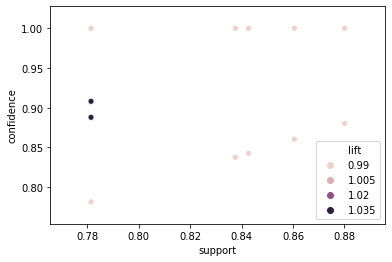

In [74]:
b = sns.scatterplot(data=rules1,x='support',y='confidence',hue='lift')
plt.show()

### Rules to predict Attrition

In [75]:

def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    rules = rules[rules['lift']>min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)
    
sup_rules = SupervisedApriori(df,consequent = ['Attrition=No','Attrition=Yes'],min_supp=0.6, min_conf=0.6, min_lift=1)
sup_rules.sort_values(by='support',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(PerformanceRating=Three),(Attrition=No),0.837585,0.842687,0.709184,0.846701,1.004763,0.003362,1.026180
6,"(Over18=Y, PerformanceRating=Three)",(Attrition=No),0.837585,0.842687,0.709184,0.846701,1.004763,0.003362,1.026180
1,(OverTime=No),(Attrition=No),0.713435,0.842687,0.636054,0.891538,1.057970,0.034852,1.450391
5,"(Over18=Y, OverTime=No)",(Attrition=No),0.713435,0.842687,0.636054,0.891538,1.057970,0.034852,1.450391
0,(BusinessTravel=Travel_Rarely),(Attrition=No),0.713435,0.842687,0.612245,0.858164,1.018367,0.011042,1.109122


### The above rules are the top 5 rules that are the most reliable because of high support and confidence

<p> Here is the link to my app: <a> https://da01.herokuapp.com </a> </p>